In [2]:
from sklearn import cross_validation, grid_search, linear_model,svm, metrics,preprocessing,pipeline
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import re
# будем отображать графики прямо в jupyter'e
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5



Populating the interactive namespace from numpy and matplotlib


## Raw data

In [3]:
raw_data = pd.read_csv('train.csv', header = 0, sep = ',')
raw_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Feature Engineering
№ | Код | Название | Примечание
  ------------- | ------------- | -------------
1 | survival | выжил   | 0 = Нет, 1 = Да
2 | pclass  | Класс билета| 1,2,3
3 | sex	| Пол |	male, female
4|Age| Возраст в годах |
5|sibsp	| Количество братьев, сестер, супруг на борту Титаника |
6|parch | Количество родилетей/детей на борту Титаника |
7|ticket | # билета |
8|fare | Стоимость билета |
9|cabin | № каюты |
10|embarked	| Порт посадки | C = Cherbourg, Q = Queenstown, S = Southampton

### 1. Каюта

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Z
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


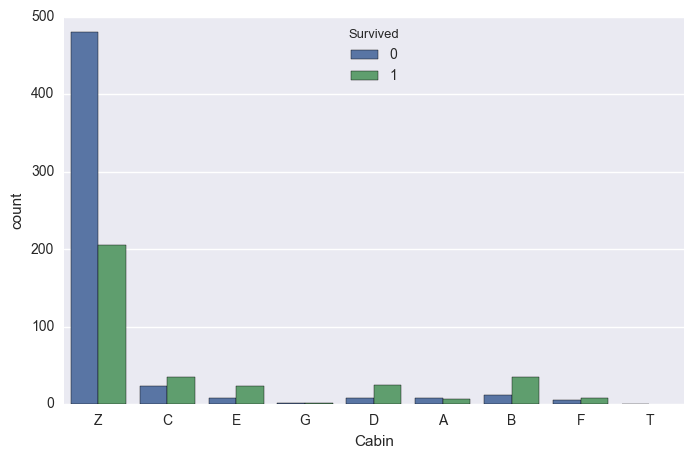

In [4]:
df_cab=raw_data[['Cabin']].fillna('Z')
df_cab['Cabin']=df_cab['Cabin'].apply(lambda x:x[0])
sns.countplot(x='Cabin', hue='Survived', data=df_cab.join(raw_data['Survived']));
# Делаем массив бинарных признаков
df_cab=pd.get_dummies(df_cab)
df_cab.head()

### 2.Класс

,Class_1,Class_2,Class_3
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


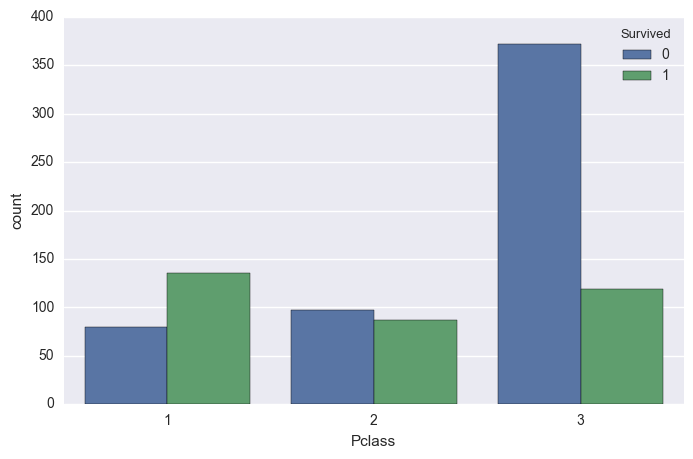

In [5]:
df_class=pd.get_dummies(raw_data['Pclass'])
df_class.columns = ['Class_1','Class_2','Class_3']
sns.countplot(x='Pclass', hue='Survived', data=df_class.join(raw_data));
df_class.head()


### 3.Возраст

#### Пробуем добораться возраст по полу
df_age=raw_data[['Sex','Age']]
male_age_mean=df_age[df_age['Sex']=='male']['Age'].mean()
female_age_mean=df_age[df_age['Sex']=='female']['Age'].mean()
df_age_male=df_age[df_age['Sex']=='male'][['Age']].fillna(male_age_mean)
df_age_female=df_age[df_age['Sex']=='female'][['Age']].fillna(female_age_mean)
df_age=df_age_male.append(df_age_female)
df_age=df_age.sort_index()


,Age0,Age1,Age2,Age3,Age4,Age5,Age6,Age7
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


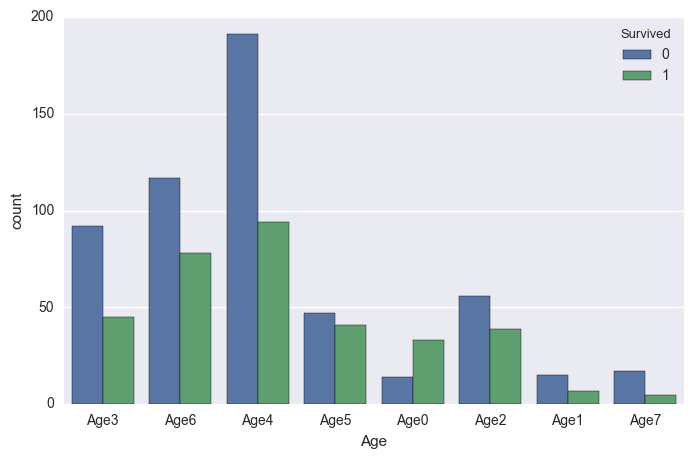

In [6]:
def age_convert(age):
    if age<=6:
        return 0
    elif age<=12:
        return 1
    elif age<=19:
        return 2
    elif age<=25:
        return 3
    elif age<=30:
        return 4
    elif age<=35:
        return 5
    elif age<=60:
        return 6
    else: 
        return 7
df_age=raw_data[['Age']]
df_age=df_age.fillna(df_age.mean())
df_age['Age']=df_age['Age'].apply(age_convert)
df_age['Age']=df_age['Age'].apply(lambda x:'Age'+str(x))
sns.countplot(x='Age', hue='Survived', data=df_age.join(raw_data['Survived']));
# Делаем массив бинарных признаков
df_age=pd.get_dummies(df_age,prefix='',prefix_sep='')
df_age.head()

### 4. Порт посадки

C:\Users\Evtisov_SS\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


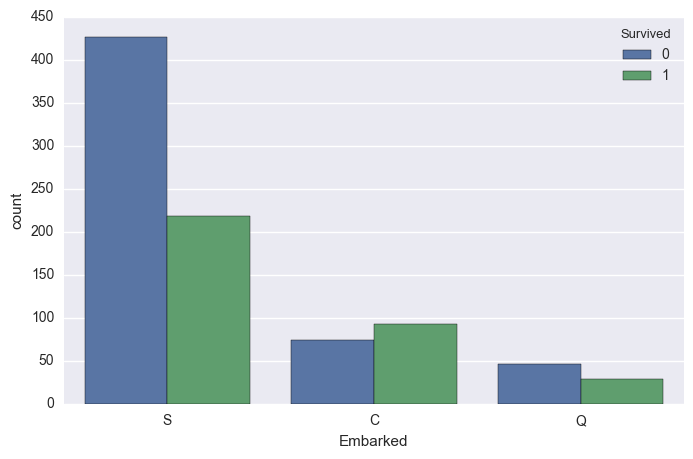

In [7]:
df_emb=raw_data[['Embarked']]
df_emb['Embarked'].fillna('S',inplace=True)
#df_class['Pclass']=df_class['Pclass'].apply(lambda x:'Class'+str(x))
sns.countplot(x='Embarked', hue='Survived', data=df_emb.join(raw_data['Survived']));
# Делаем массив бинарных признаков
df_emb=pd.get_dummies(df_emb)
df_emb.head()

### 5. Семья

C:\Users\Evtisov_SS\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Evtisov_SS\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


   Family
0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1


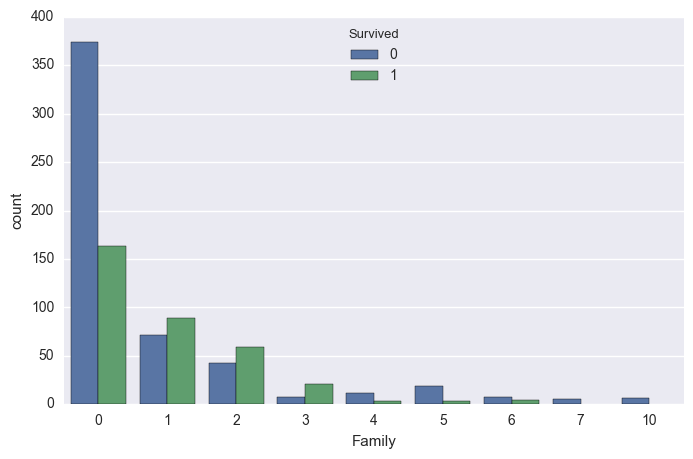

In [8]:
df_fam=raw_data[['SibSp','Parch']]
df_fam['Family']=df_fam["SibSp"]+df_fam["Parch"]
df_fam.drop(['SibSp','Parch'],axis=1,inplace=True)
df_fam1=df_fam.copy()
sns.countplot(x='Family', hue='Survived', data=df_fam.join(raw_data['Survived']));
# Делаем массив бинарных признаков
#df_fam1['Family'].loc[df_fam1['Family'] > 0] = 1
#df_fam1['Family'].loc[df_fam1['Family'] == 0] = 0
print (df_fam.head(10))
#print (df_fam1.head(10))


### 6.Title

C:\Users\Evtisov_SS\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Evtisov_SS\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Evtisov_SS\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Rare
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,1.0,0.0


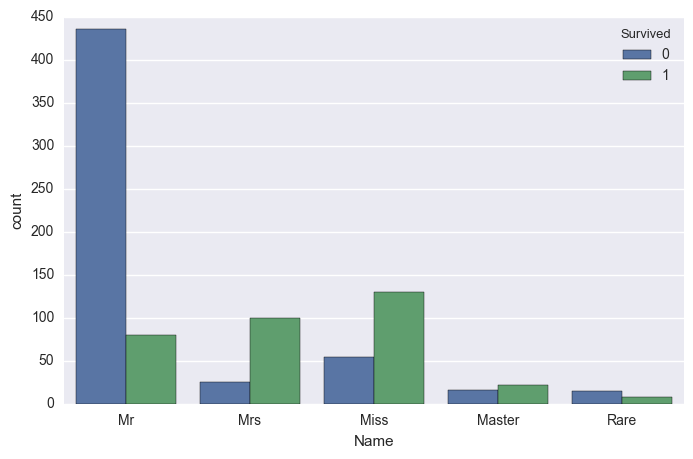

In [9]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

df_title= raw_data[['Name']]
df_title['Name']=df_title['Name'].apply(get_title)
df_title['Name'] = df_title['Name'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_title['Name'] = df_title['Name'].replace('Mlle', 'Miss')
df_title['Name'] = df_title['Name'].replace('Ms', 'Miss')
df_title['Name'] = df_title['Name'].replace('Mme', 'Mrs')
sns.countplot(x='Name', hue='Survived', data=df_title.join(raw_data['Survived']));
df_title=pd.get_dummies(df_title)
df_title.head(10)

### 7. Пол

In [10]:
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
df_sex=raw_data[['Sex','Age']]
df_sex['Age']=df_sex['Age'].fillna(df_sex['Age'].mean())
df_sex['Person'] = df_sex[['Age','Sex']].apply(get_person,axis=1)
df_sex.drop(['Sex','Age'],axis=1,inplace=True)
df_sex=pd.get_dummies(df_sex)
df_sex.head(10)

C:\Users\Evtisov_SS\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Evtisov_SS\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Evtisov_SS\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

,Person_child,Person_female,Person_male
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0
6,0.0,0.0,1.0
7,1.0,0.0,0.0
8,0.0,1.0,0.0
9,1.0,0.0,0.0


### Fare

In [11]:
df_fare=raw_data[['Fare']]
df_fare.loc[df_fare['Fare'] <= 7.91,'Fare']=0
df_fare.loc[(df_fare['Fare'] > 7.91) & (df_fare['Fare'] <= 14.454), 'Fare'] = 1
df_fare.loc[(df_fare['Fare'] > 14.454) & (df_fare['Fare'] <= 31), 'Fare']   = 2
df_fare.loc[ df_fare['Fare'] > 31, 'Fare'] = 3
df_fare['Fare'] = df_fare['Fare'].astype(int)
df_fare

C:\Users\Evtisov_SS\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Evtisov_SS\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Evtisov_SS\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

,Fare
0,0
1,3
2,1
3,3
4,1
5,1
6,3
7,2
8,1
9,2


In [12]:
target=raw_data[['Survived']]
target=target.values.ravel()
data=raw_data[['Fare']]
#data['Sex']=raw_data.Sex.apply( lambda x:0 if x == 'male' else 1 )
data['Fare']=data['Fare'].apply(lambda x:int(x/20))
#data=df_fare
#data=data.join(df_fare)
data=data.join(df_age)
data=data.join(df_class)
data=data.join(df_cab)
data=data.join(df_emb)
data=data.join(df_fam)
data=data.join(df_title)
data=data.join(df_sex)
data.head(10)

C:\Users\Evtisov_SS\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Fare,Age0,Age1,Age2,Age3,Age4,Age5,Age6,Age7,Class_1,...,Embarked_S,Family,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Rare,Person_child,Person_female,Person_male
0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Модели

In [13]:
def fit(name,regressor,cv_strategy):
    #создаем pipeline из двух шагов: scaling и классификация
    est = pipeline.Pipeline(steps = [('scaling', preprocessing.StandardScaler(with_mean = 0)), ('regression', regressor)])
     # Выводим точность классификатора на отложенном тесте
    est.fit(train_data, train_labels)
    split_acc=metrics.accuracy_score(test_labels, est.predict(test_data))
    # Точность на кросс валидации
    sv_scoring = cross_validation.cross_val_score(est, data, target, scoring = 'accuracy', cv = cv_strategy)
    return name,round(split_acc,3),round(sv_scoring.mean(),3), round(sv_scoring.max(),2), round(sv_scoring.min(),2), round(sv_scoring.std(),2)

train_data,test_data,train_labels,test_labels=cross_validation.train_test_split(data, target, test_size=0.33, random_state=1)

cv_strategy = cross_validation.StratifiedShuffleSplit(target, n_iter = 20 , test_size = 0.3, random_state = 2)
models=(
        ("LinearLogisticRegression",linear_model.LogisticRegression(random_state = 1)),
        ("LinearRidgeClassifier",linear_model.RidgeClassifier(random_state = 1)),
        ("LinearSVC",svm.LinearSVC(random_state=1)),
        ("NuSVC",svm.NuSVC(random_state=1)),
        ("SVC-rbf",svm.SVC(kernel='rbf',random_state=1)),
        ("SVC-sigmoid",svm.SVC(kernel='sigmoid',random_state=1)),
        ("SVC-poly",svm.SVC(kernel='poly',random_state=1)),   
        ("RandomForestClassifier",RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0))
    
)

result=pd.DataFrame(columns=['Name','ACC',"CV_mean","CV_max", "CV_min","SV_std"])

for model in models:
    score=fit (model[0],model[1],cv_strategy)
    result.loc[len(result)]=score
print(result['CV_mean'].mean())
result.sort_values(by='CV_mean',  ascending=False)

0.799375


,Name,ACC,CV_mean,CV_max,CV_min,SV_std
7,RandomForestClassifier,0.800,0.838,0.87,0.79,0.02
0,LinearLogisticRegression,0.776,0.828,0.87,0.80,0.02
2,LinearSVC,0.780,0.826,0.87,0.79,0.02
1,LinearRidgeClassifier,0.786,0.824,0.87,0.79,0.02
4,SVC-rbf,0.773,0.824,0.86,0.78,0.02
6,SVC-poly,0.776,0.820,0.84,0.78,0.02
3,NuSVC,0.763,0.819,0.85,0.79,0.02
5,SVC-sigmoid,0.590,0.616,0.62,0.62,0.00


## Подбор параметров по сетке

In [20]:
from sklearn.grid_search import GridSearchCV
from time import time

### RandomForest

In [24]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
#param_grid = {"max_depth": [3, None]}
reg=RandomForestClassifier(random_state=0)
est = pipeline.Pipeline(steps = [('scaling', preprocessing.StandardScaler(with_mean = 0)), ('regression', reg)])

# run grid search
grid_search = GridSearchCV(reg, param_grid=param_grid)
start = time()
grid_search.fit(train_data, train_labels)

#print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
#      % (time() - start, len(grid_search.cv_results_['params'])))
#report(grid_search.cv_results_)
grid_search.cv

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [29]:
grid_search.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, None]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)>